In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/kaggle/input/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv


In [2]:
#import sci-kit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Goal

The goal of this notebook is to try to classify the images as galaxies, stars, or quasars using logistic regression. This is a work in progress and I would like to keep implementing new algorithms to try to classify these images.

# Exploratory Data Analysis

In [3]:
sdss = pd.read_csv('/kaggle/input/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv')
sdss

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268


Now that we have it loaded up, let's look at all the different features.

In [4]:
sdss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  int64  
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  uint64 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+

In [5]:
print('Number of NaN values for each feature:\n',sdss.isnull().sum())

Number of NaN values for each feature:
 objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [6]:
print('Number of uniques values for each feature:\n',sdss.nunique())

Number of uniques values for each feature:
 objid         67951
ra            99998
dec           99998
u             79840
g             85895
r             87969
i             88623
z             89451
run             516
rerun             1
camcol            6
field           840
specobjid    100000
class             3
redshift      99298
plate          6117
mjd            2167
fiberid        1000
dtype: int64


It also appears that the object id is not unique for each class, which raises the question: Are there duplicate objects? According to the Glossary of SDSS Terminology (https://www.sdss.org/dr12/help/glossary/#O), it turns out that the objects are enumerated within the given image field which may result in duplicate numbers in a different field. Looking at the specobjid, we can see that there are 100,000 unique spectras which means there should be 100,000 unique objects.

In [7]:
sdss.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


Some of these columns are here mostly for keeping track of the images such as objid and specobjid. Objid and Specobjid are made of the other features camcol, field, mjd, plate, fiberid, run, and rerun. It is made using a bitmask over a 64 bit ID. These features do not really describe the star, galaxy, or quasar which means we can drop all of these features. 

I am also going to train my logistic regression classifier without the RA and DEC since I don't want my model to be more inclined to classify an object based on where it is in the sky. RA and DEC are just coordinates of the star/galaxy/quasar which means they are not actual features of these objects.

I aim to predict the object based on the photometric/spectral qualities of the objects which means I will only use u, g, r, i, z, and redshift for my predictions.

In [8]:
sdss_features = sdss.drop(columns=['objid', 'ra','dec', 'run', 'rerun', 'camcol', 'field','specobjid', 'plate', 'mjd', 'fiberid'])
sdss_features

,u,g,r,i,z,class,redshift
0,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115
1,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093
2,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165
3,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155
4,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210
...,...,...,...,...,...,...,...
99995,19.32631,18.82748,18.65659,18.60481,18.60917,QSO,0.438182
99996,18.33687,17.30365,17.16037,17.14895,17.14419,STAR,-0.000497
99997,17.50690,15.63152,15.22328,15.04469,15.28668,GALAXY,0.004587
99998,19.33946,17.21436,16.29697,15.86745,15.51556,GALAXY,0.084538


Now, let's take a deeper look into these features. 

In [9]:
sdss_features.describe()

,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.637915,17.407128,16.881676,16.625534,16.467087,0.170621
std,0.832284,0.985921,1.133337,1.209532,1.281788,0.437571
min,10.611810,9.668339,9.005167,8.848403,8.947795,-0.004136
25%,18.212902,16.852982,16.196608,15.865275,15.619960,0.000001
50%,18.873250,17.515860,16.890640,16.599885,16.428385,0.045997
75%,19.273302,18.056060,17.585750,17.344912,17.234625,0.095429
max,19.599950,19.996050,31.990100,32.141470,29.383740,7.011245


We can see that the numbers make sense considering the magnitude goes up, which means the object is dimmer, when the redshift goes up, which means the object is farther. The mean redshift is 0.17 which can be used to calculate the distance to the objects. The calculation is involved so I just used a calculator (http://www.astro.ucla.edu/~wright/CosmoCalc.html) to get an approximate distance. The average distance to all of the objects turns out to be 668 Mpc or 2.06e22 km. The furthest object is 2.21e23 km away and the closest is 5.30e20 km. These distances just give us an idea of the range of distances which these objects span. We will now look at the values for each specific class.

# Data Visualization

In [10]:
#Filter each class
stars = sdss_features[sdss_features['class'] == 'STAR']
quasars = sdss_features[sdss_features['class'] == 'QSO']
galaxies = sdss_features[sdss_features['class'] == 'GALAXY']

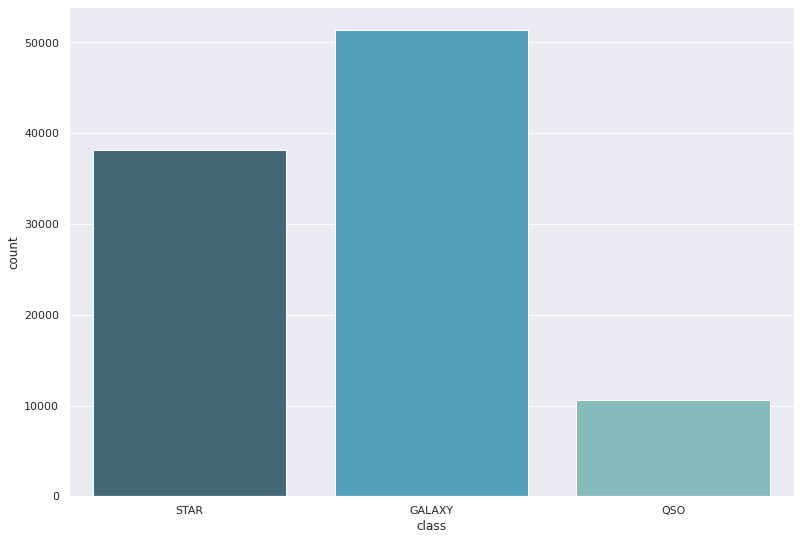

In [11]:
color_palette = 'GnBu_d'
sns.set()
fig = plt.gcf()
fig.set_size_inches(13,9)
sns.countplot(sdss_features['class'], palette=color_palette)
plt.show()

We can see that we have 4-5x more galaxies and stars compared to quasars. This means that our model may be a little less accurate in being able to predict quasars due to the low number of samples.

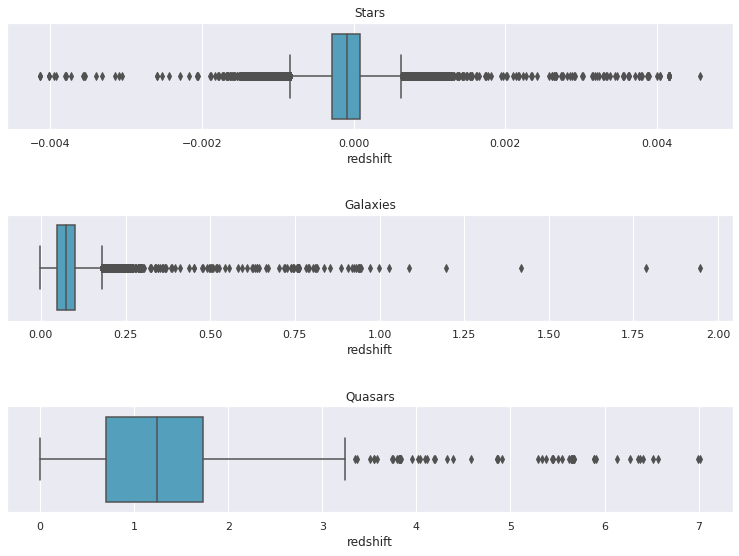

In [12]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(nrows=3)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.subplots_adjust(hspace=0.8)
sns.boxplot(stars['redshift'], palette=color_palette, ax=axs[0]).set_title('Stars')
sns.boxplot(galaxies['redshift'], palette=color_palette, ax=axs[1]).set_title('Galaxies')
sns.boxplot(quasars['redshift'], palette=color_palette, ax=axs[2]).set_title('Quasars')
plt.show()

These plots show the distribution of redshifts for each class and give us insight about the distance to each class. We can see that stars are the closest, galaxies are further, and the furthest are the quasars. We can see from this that this may be an important feature when classifying each object since the distribution of redshifts is different for each class.

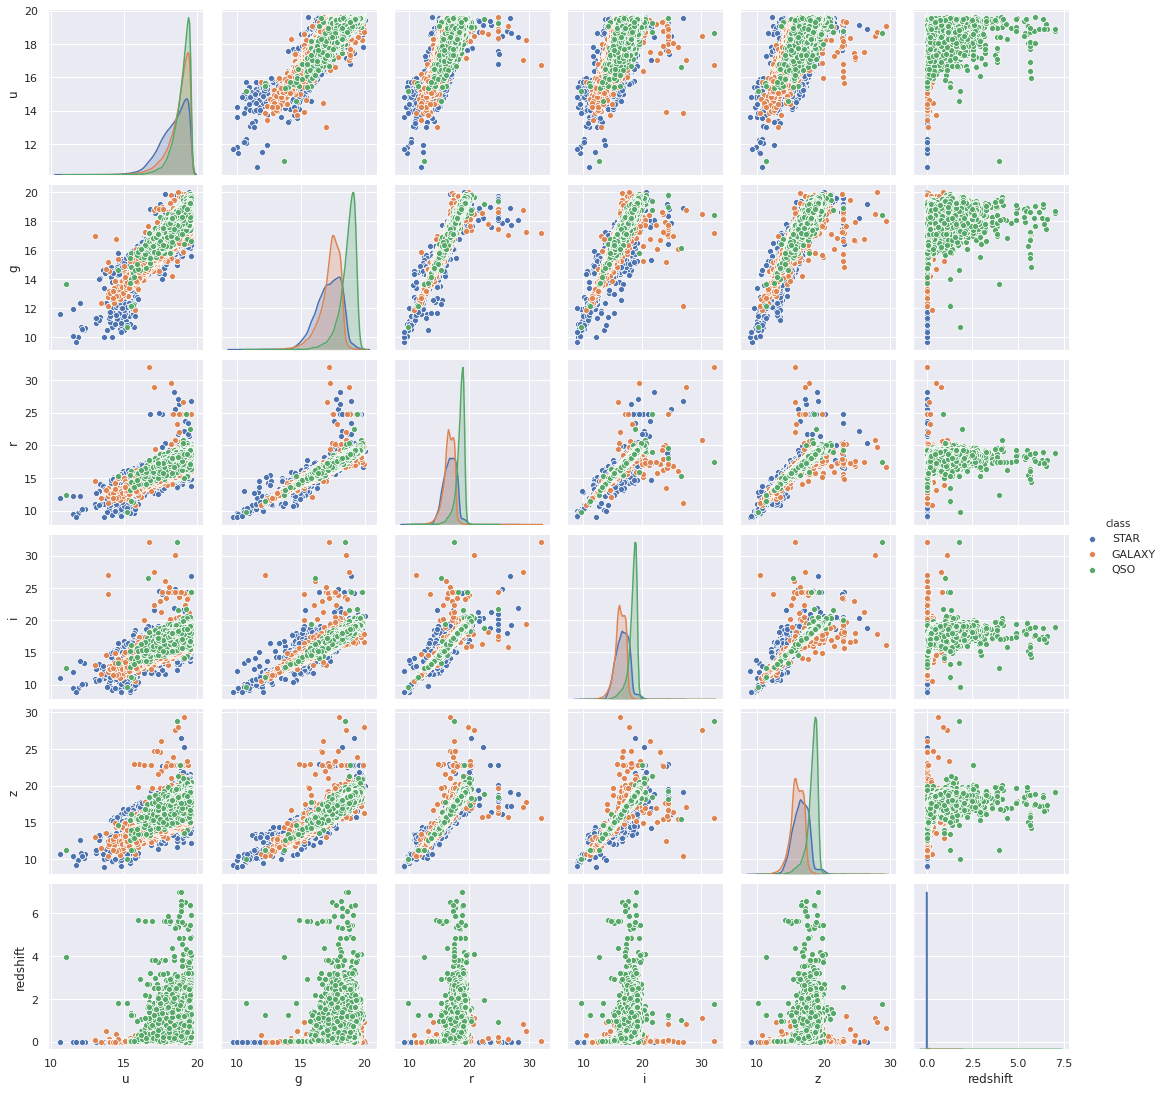

In [13]:
sns.set(style='darkgrid')
sns.pairplot(sdss_features, hue='class')
plt.show()

The pairplot shows us that many of the features are linearly correlated for the classes. This is to be expected since the magnitude is a measure of how bright the object is basically, so as the magnitude increases for one wavelength then it should also increase for the other wavelengths. The distribution of each magnitude is also similar for each class which means it might be harder to group them based on just the wavelengths.

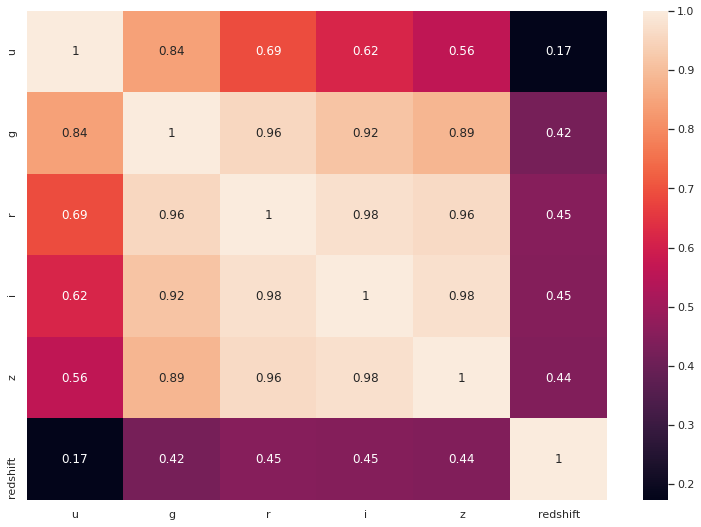

In [14]:
sdss_features_corr = sdss_features.corr()
fig = plt.gcf()
fig.set_size_inches(13,9)
sns.heatmap(sdss_features_corr, annot=True)
plt.show()

It looks like the u, g, r, i, and z features are all highly correlated which points to multicollinearity. One of the assumptions of logistic regression is that there is no multicollinearity, however, each of these features provide different information on different wavelengths of light for the image. Instead of trying to drop some of the wavelengths which may have important information about each of the examples, I will just use L2 regularization or ridge regression to minimize some of the coefficients which should reduce the effect of multicollinearity since it will penalize the coefficients of some features.

# Feature Engineering

So now that we've had a closer look into our data it's time to use logistic regression to classify. First, we will need to split the data into a training set and a test set.

In [15]:
sdss_data = sdss_features[['u','g','r','i','z','redshift']]

#Need to factorize the classes or convert to numerical labels to use in model, returns label array and unique value array, only need the first array
sdss_target = pd.factorize(sdss_features['class'])[0]


#Split data 70/30 and set randomstate to 0 to get the same split every time it is split
x_train, x_test, y_train, y_test = train_test_split(sdss_data, sdss_target, test_size=0.30, random_state=0)

Next we will want to scale our parameters since the redshift is much smaller than all of the other features. I will use the RobustScaler since a lot of the redshift values are high for quasars compared to the redshift values for the stars or galaxies. This may be interpreted as outliers.

In [16]:
robust_scaler = RobustScaler()

#fit_transform will first perform fit and calculates the parameters, then applies transform 
x_train = robust_scaler.fit_transform(x_train)

#just need to transform since fit was already called
x_test = robust_scaler.transform(x_test)

# Apply Logistic Regression

Classification Test Score: 0.9838 

Classification Performance:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     11408
           1       0.99      0.98      0.98     15393
           2       0.98      0.95      0.96      3199

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000
 

Train Score: 0.9830714285714286


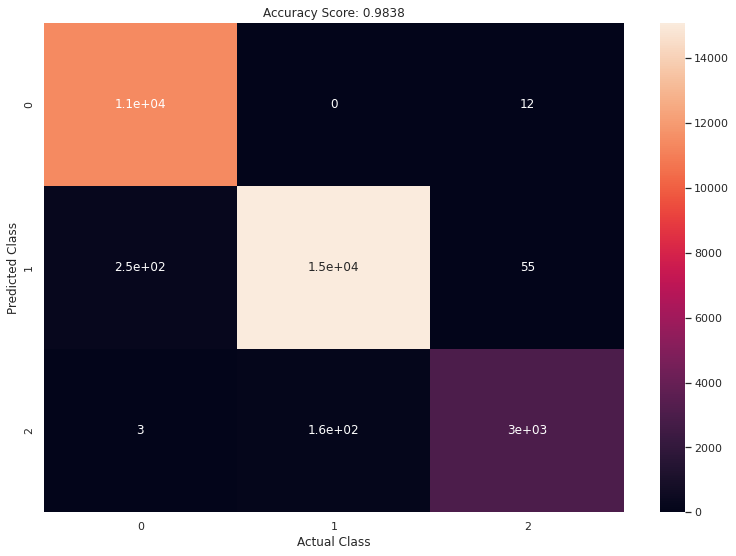

In [17]:
logRegression = LogisticRegression(max_iter=350)

logRegression.fit(x_train, y_train)
predictions = logRegression.predict(x_test)

accuracy = logRegression.score(x_test, y_test)

print('Classification Test Score:', accuracy ,'\n')
print('Classification Performance:\n', classification_report(y_test, predictions),'\n')
print('Train Score:', logRegression.score(x_train,y_train))

cm = confusion_matrix(y_test, predictions)

fig = plt.gcf()
fig.set_size_inches(13,9)
sns.heatmap(cm, annot=True).set_title('Accuracy Score: {}'.format(accuracy))
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

plt.show()

In this matrix 0 corresponds to stars, 1 to galaxies, and 2 to quasars.

The confusion matrix shows that a lot of the galaxies were misclassifed as stars and a lot quasars were misclassifed as galaxies. The misclassification of the quasars as galaxies may be from the distribution of redshifts for each of them overlapping. The misclassifcation of the galaxies may be from the overlapping points of u, g, r, i, and z features.

# Conclusion

In conclusion, our model was able to achieve an accuracy of 93% on the test data which is not bad. Unfortunately, some of the classes were misclassified due to overlaps in the distributions of redshifts and the multicollinearity of the wavelength features. I also found that using the MinMaxScaler resulted in an accuracy of 83% and when I switched to RobustScaler then the accuracy increased to 93%. I believe this is because of the difference in redshifts between the quasars and galaxies/stars. The max-min redshift of the data may have caused it to scale down too much while the RobustScaler was able to account for this by using the interquartile range instead.